<a href="https://colab.research.google.com/github/lavliekstocode/AcademiSync/blob/main/ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib

In [ ]:
import zipfile

zip_path = "/content/Data Science Machine failure prediction - Major project (1).zip"  # Your ZIP file path

# Extract directly into /content/
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/")  # Extracts all files into /content/

print("Extraction complete!")
!ls /content/
!find /content/ -type d
!find /content/ -name "*.csv"


Extraction complete!
'Data Science Machine failure prediction - Major project (1).zip'   sample_data
'Machine failure prediction - Major project'
/content/
/content/.config
/content/.config/configurations
/content/.config/logs
/content/.config/logs/2025.03.06
/content/Machine failure prediction - Major project
/content/sample_data
/content/Machine failure prediction - Major project/data (1).csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/mnist_test.csv
/content/sample_data/california_housing_test.csv
/content/sample_data/california_housing_train.csv


In [ ]:
data = "/content/Machine failure prediction - Major project/data (1).csv"
df = pd.read_csv(data)

df.head()


,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


In [ ]:
# Summary statistics
df.describe()


,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


In [ ]:

df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


,0
footfall,0
tempMode,0
AQ,0
USS,0
CS,0
VOC,0
RP,0
IP,0
Temperature,0
fail,0


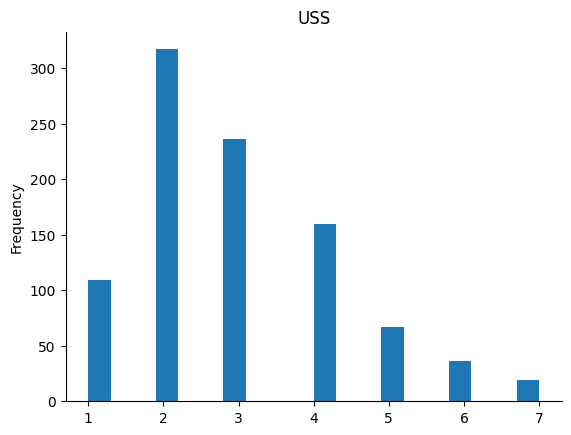

In [ ]:
from matplotlib import pyplot as plt
df['USS'].plot(kind='hist', bins=20, title='USS')
plt.gca().spines[['top', 'right',]].set_visible(False)

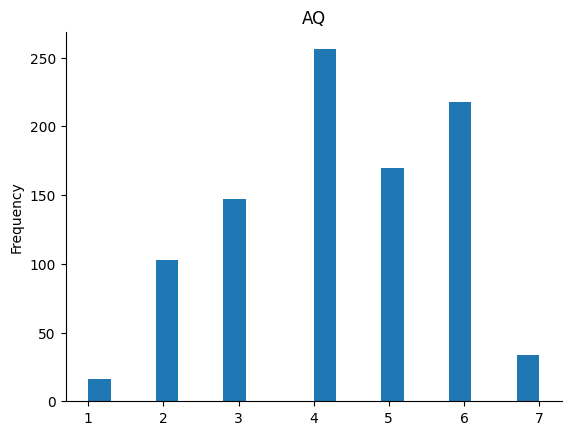

In [ ]:
from matplotlib import pyplot as plt
df['AQ'].plot(kind='hist', bins=20, title='AQ')
plt.gca().spines[['top', 'right',]].set_visible(False)

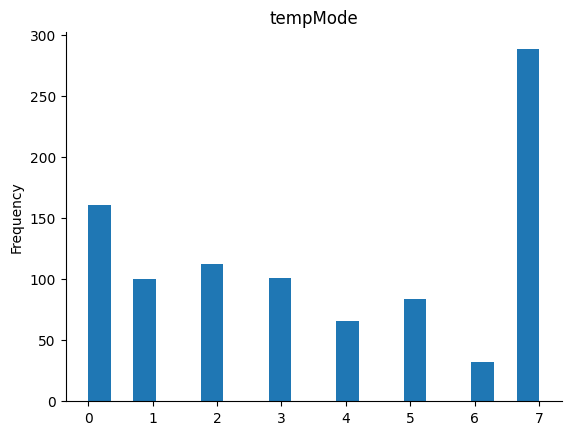

In [ ]:
from matplotlib import pyplot as plt
df['tempMode'].plot(kind='hist', bins=20, title='tempMode')
plt.gca().spines[['top', 'right',]].set_visible(False)

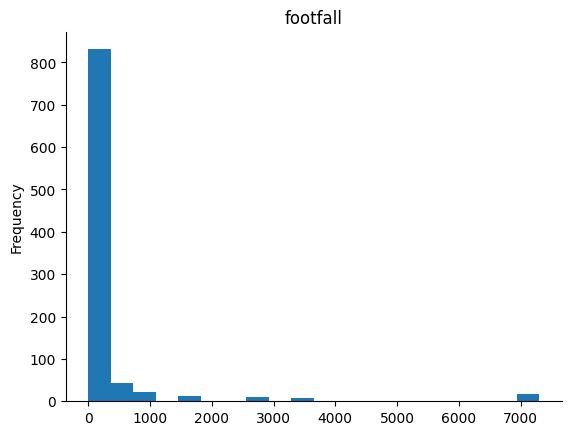

In [ ]:
from matplotlib import pyplot as plt
df['footfall'].plot(kind='hist', bins=20, title='footfall')
plt.gca().spines[['top', 'right',]].set_visible(False)

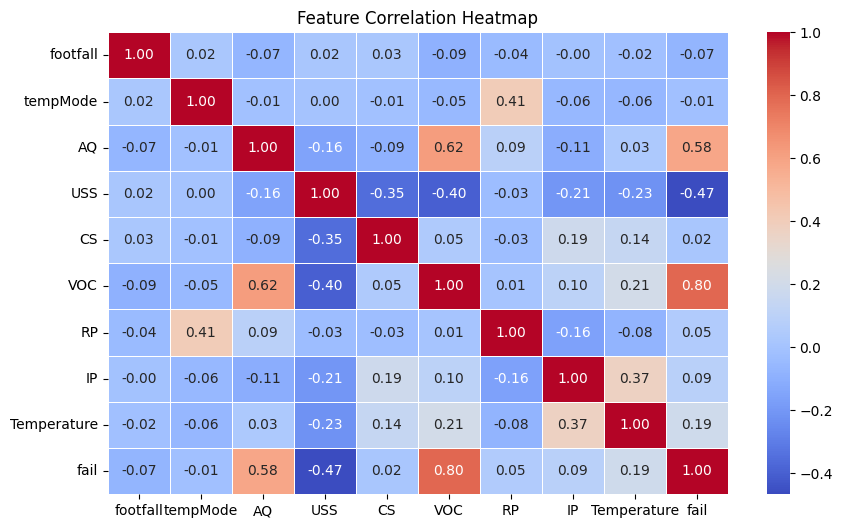

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


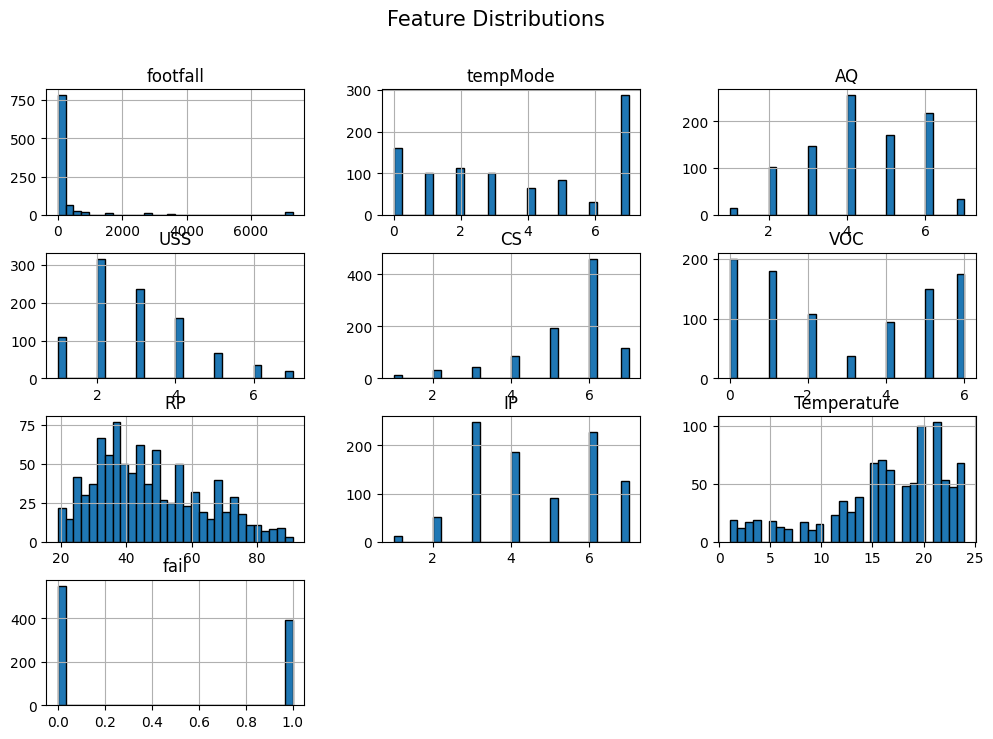

In [ ]:
df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=15)
plt.show()


<ipython-input-26-9d10d0022774>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, palette="coolwarm")


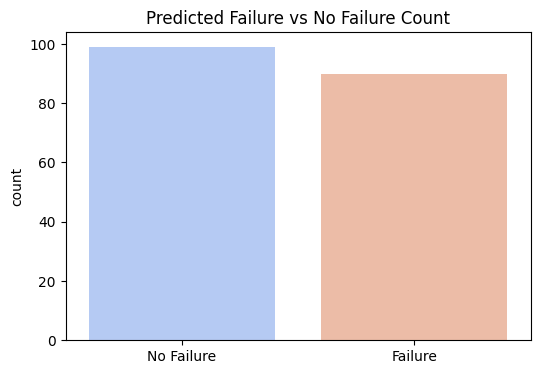

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y_pred, palette="coolwarm")
plt.xticks([0, 1], ["No Failure", "Failure"])
plt.title("Predicted Failure vs No Failure Count")
plt.show()

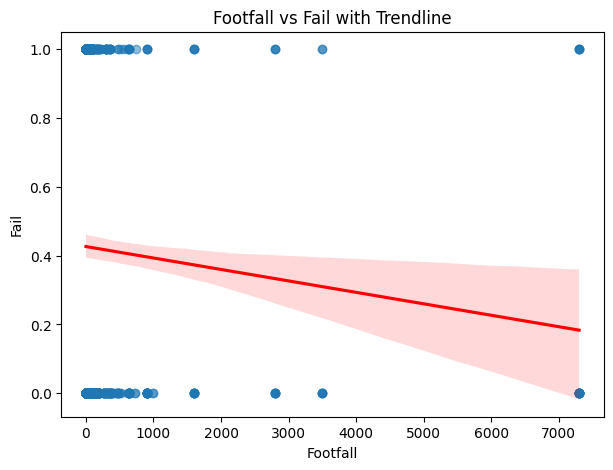

In [ ]:
plt.figure(figsize=(7, 5))
sns.regplot(x=df['footfall'], y=df['fail'], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("Footfall")
plt.ylabel("Fail")
plt.title("Footfall vs Fail with Trendline")
plt.show()


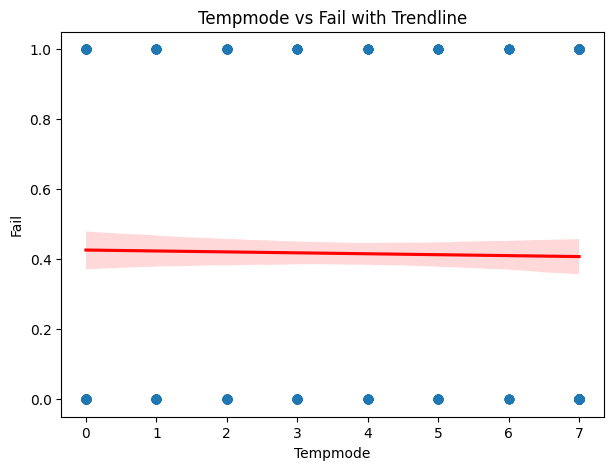

In [ ]:
plt.figure(figsize=(7, 5))
sns.regplot(x=df['tempMode'], y=df['fail'], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("Tempmode")
plt.ylabel("Fail")
plt.title("Tempmode vs Fail with Trendline")
plt.show()

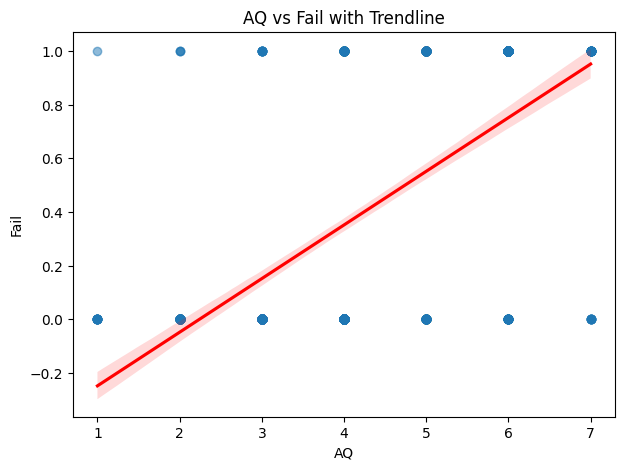

In [ ]:
plt.figure(figsize=(7, 5))
sns.regplot(x=df['AQ'], y=df['fail'], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("AQ")
plt.ylabel("Fail")
plt.title("AQ vs Fail with Trendline")
plt.show()

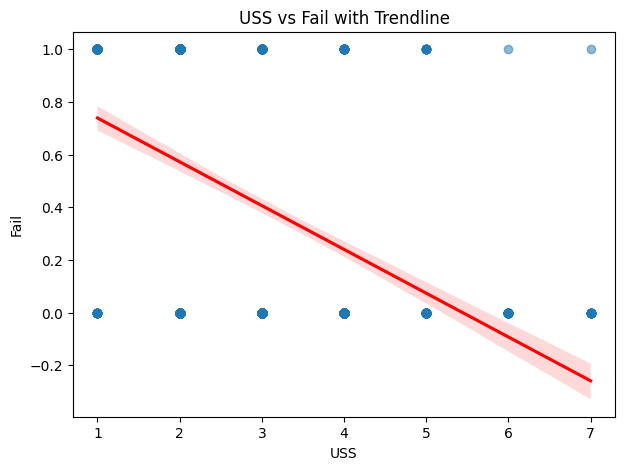

In [ ]:
plt.figure(figsize=(7, 5))
sns.regplot(x=df['USS'], y=df['fail'], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("USS")
plt.ylabel("Fail")
plt.title("USS vs Fail with Trendline")
plt.show()

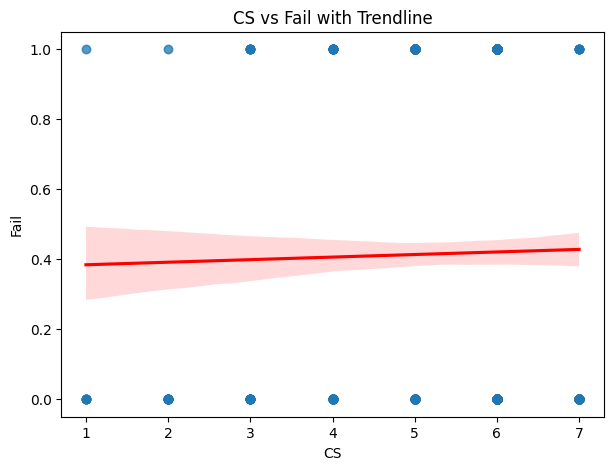

In [ ]:
plt.figure(figsize=(7, 5))
sns.regplot(x=df['CS'], y=df['fail'], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("CS")
plt.ylabel("Fail")
plt.title("CS vs Fail with Trendline")
plt.show()

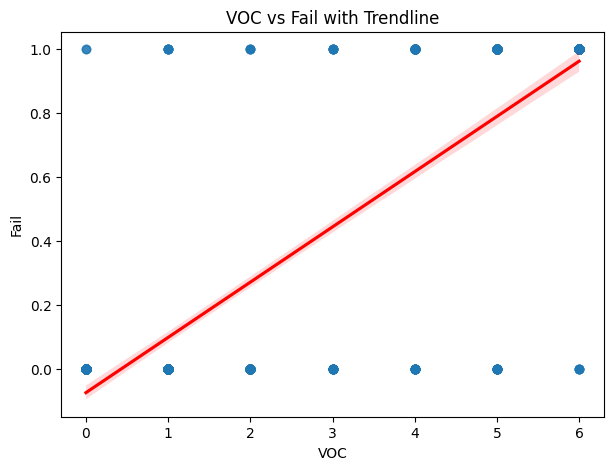

In [ ]:
plt.figure(figsize=(7, 5))
sns.regplot(x=df['VOC'], y=df['fail'], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("VOC")
plt.ylabel("Fail")
plt.title("VOC vs Fail with Trendline")
plt.show()

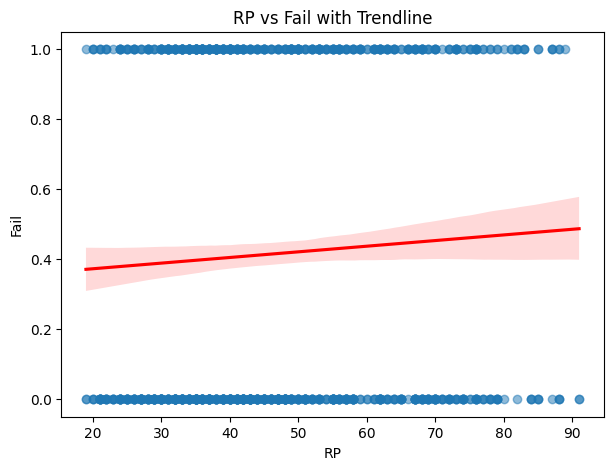

In [ ]:
plt.figure(figsize=(7, 5))
sns.regplot(x=df['RP'], y=df['fail'], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("RP")
plt.ylabel("Fail")
plt.title("RP vs Fail with Trendline")
plt.show()

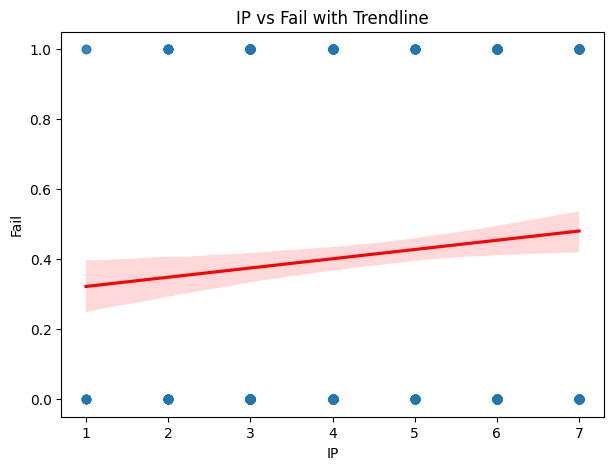

In [ ]:
plt.figure(figsize=(7, 5))
sns.regplot(x=df['IP'], y=df['fail'], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("IP")
plt.ylabel("Fail")
plt.title("IP vs Fail with Trendline")
plt.show()

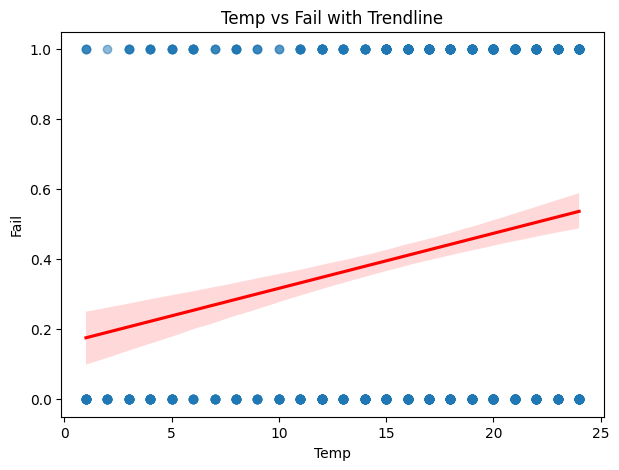

In [ ]:
plt.figure(figsize=(7, 5))
sns.regplot(x=df['Temperature'], y=df['fail'], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("Temp")
plt.ylabel("Fail")
plt.title("Temp vs Fail with Trendline")
plt.show()

In [ ]:
X = df[['footfall', 'tempMode', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP', 'Temperature']]
y = df['fail']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
print(y_pred)
print(y_test)

[1 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0
 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1
 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1
 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1
 1 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1
 0 0 0 1]
96     1
265    0
811    1
23     1
30     0
      ..
764    1
551    1
109    0
77     0
215    1
Name: fail, Length: 189, dtype: int64


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.87


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       102
           1       0.84      0.89      0.86        87

    accuracy                           0.87       189
   macro avg       0.87      0.87      0.87       189
weighted avg       0.87      0.87      0.87       189



In [ ]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[87 15]
 [10 77]]


In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8677248677248677
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       102
           1       0.84      0.89      0.86        87

    accuracy                           0.87       189
   macro avg       0.87      0.87      0.87       189
weighted avg       0.87      0.87      0.87       189



In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8571428571428571


In [ ]:
joblib.dump(knn_model, 'knn_failure_model.pkl')

['knn_failure_model.pkl']

In [ ]:
knn_model = joblib.load('knn_failure_model.pkl')

In [ ]:
def predict_failure(footfall, tempMode, AQ, USS, CS, VOC, RP, IP, Temperature):
    input_data = np.array([[footfall, tempMode, AQ, USS, CS, VOC, RP, IP, Temperature]])

    prediction = knn_model.predict(input_data)

    return "Failure Expected" if prediction[0] == 1 else "No Failure"

In [ ]:
result = predict_failure(100, 2, 50, 20, 5, 0.3, 1500, 10, 75)
print(result)

Failure Expected


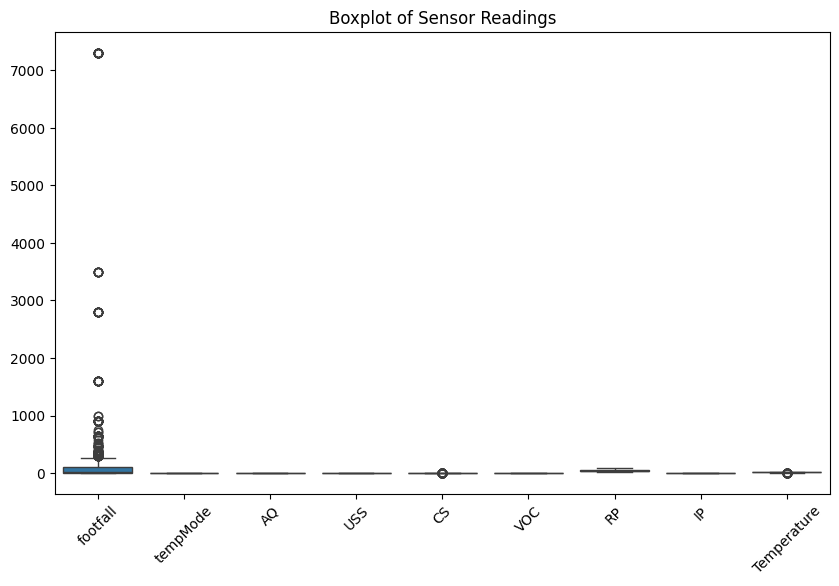

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns=["fail"]))
plt.title("Boxplot of Sensor Readings")
plt.xticks(rotation=45)
plt.show()

<ipython-input-24-9d10d0022774>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, palette="coolwarm")


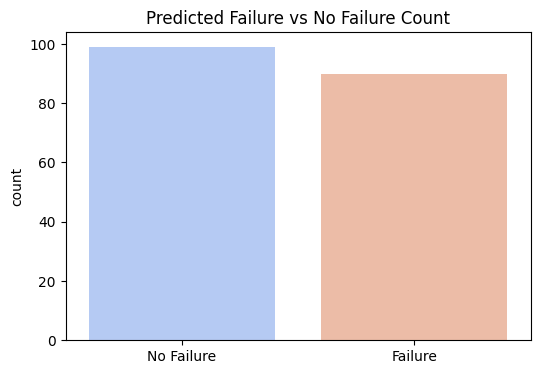